In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#%%capture
#!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip -o /content/dogImages.zip
#!mv /content/dogImages /content/drive/My\ Drive/dog-breeds/dog_images

# Some path and file names for this experiment

Here we can try to hide the information about paths that actually do not change, and keep the configuration for the experiment description, that is the actual thing that the user needs to change. 

In [1]:
import numpy as np
from glob import glob
import sys

experiment_description = 'refactor'

##################### DO NOT MODIFY ################################
project_path = '/content/drive/My Drive/dog-breeds/'
experiment_location = project_path + experiment_description
escaped_exp_location = experiment_location.replace(" ", "\\ ")
!mkdir $escaped_exp_location
model_file = experiment_location + '/model_ ' + experiment_description
output_file = experiment_location + '/' + experiment_description
sys.path.append(project_path)
dog_files = np.array(glob(project_path + "dog_images/*/*/*"))
print('There are %d total dog images.' % len(dog_files))
##################### END: DO NOT MODIFY ###########################

mkdir: cannot create directory ‘/content/drive/My Drive/dog-breeds/refactor’: File exists
There are 8351 total dog images.


# Image augmentation

This one has definitely have to go to a library, together with the rest of the data pre-processing we are making. I guess this notebook should keep the configuration for the current experiment as an object creation. 

/content/drive/My Drive/dog-breeds/utils/preprocess.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for i in range(columns)))


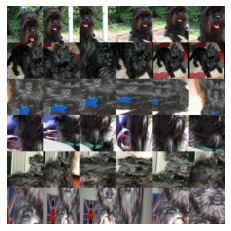

In [2]:
from utils.preprocess import *
sometimes = lambda aug: iaa.Sometimes(0.9, aug)

augmentationList = [iaa.Resize((224, 224)), 
                    sometimes(iaa.Crop(percent=(0, 0.45)))
                    ]

transforms = ImgAugTransform(augmentationList)
dataset = torchvision.datasets.ImageFolder(project_path + 'dog_images/train', transform=transforms)
show_sample(dataset, 6, 6)

# Train

This has to go to a library

In [0]:
from utils.preprocess import *
from utils.resnet_model import *
from utils.train import *

# Experiment

A lot of things here need to be separated:

 - Creation of dataset loaders
 - NN architecture
 - Hyperparameter dictionaries
 - Testing and Rebooting functions
 - Experiment loop
 - Visualization

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import torch
from torchvision import datasets
import torch.optim as optim
from PIL import ImageFile
import matplotlib.pyplot as plt
import datetime

ImageFile.LOAD_TRUNCATED_IMAGES = True

train_path = project_path + 'dog_images/train'
validation_path = project_path +'dog_images/valid'
test_path = project_path +'dog_images/test'

default_transformations = default_transformation()
training_transformations = mixed_transformation(ImgAugTransform(augmentationList))

datasets_scratch, loaders_scratch = build_datasets(train_path, 
                                        validation_path, 
                                        test_path, 
                                        default_transformations, 
                                        training_transformations)

model_scratch = resnet18()
print (model_scratch)

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

learning_rates = [
                 #0.001
                 0.0015,
                 #0.0025,
                 #0.0035

                 ]

optimizers = [
                #optim.Adagrad,
                optim.Adam
            ]

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)   

hyperparameters_dictionary = {
    'learning_rates' : learning_rates,
    'epochs' : 100,
    'optimizers' : optimizers,
    'model' : resnet18()
}

run_experiments(datasets_scratch, loaders_scratch, hyperparameters_dictionary, use_cuda, model_file)




ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2_x): Sequential(
    (0): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_